___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [4]:
df= pd.read_csv('/home/mithu/Videos/Python for Data Science/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/KNN_Project_Data')

**Check the head of the dataframe.**

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

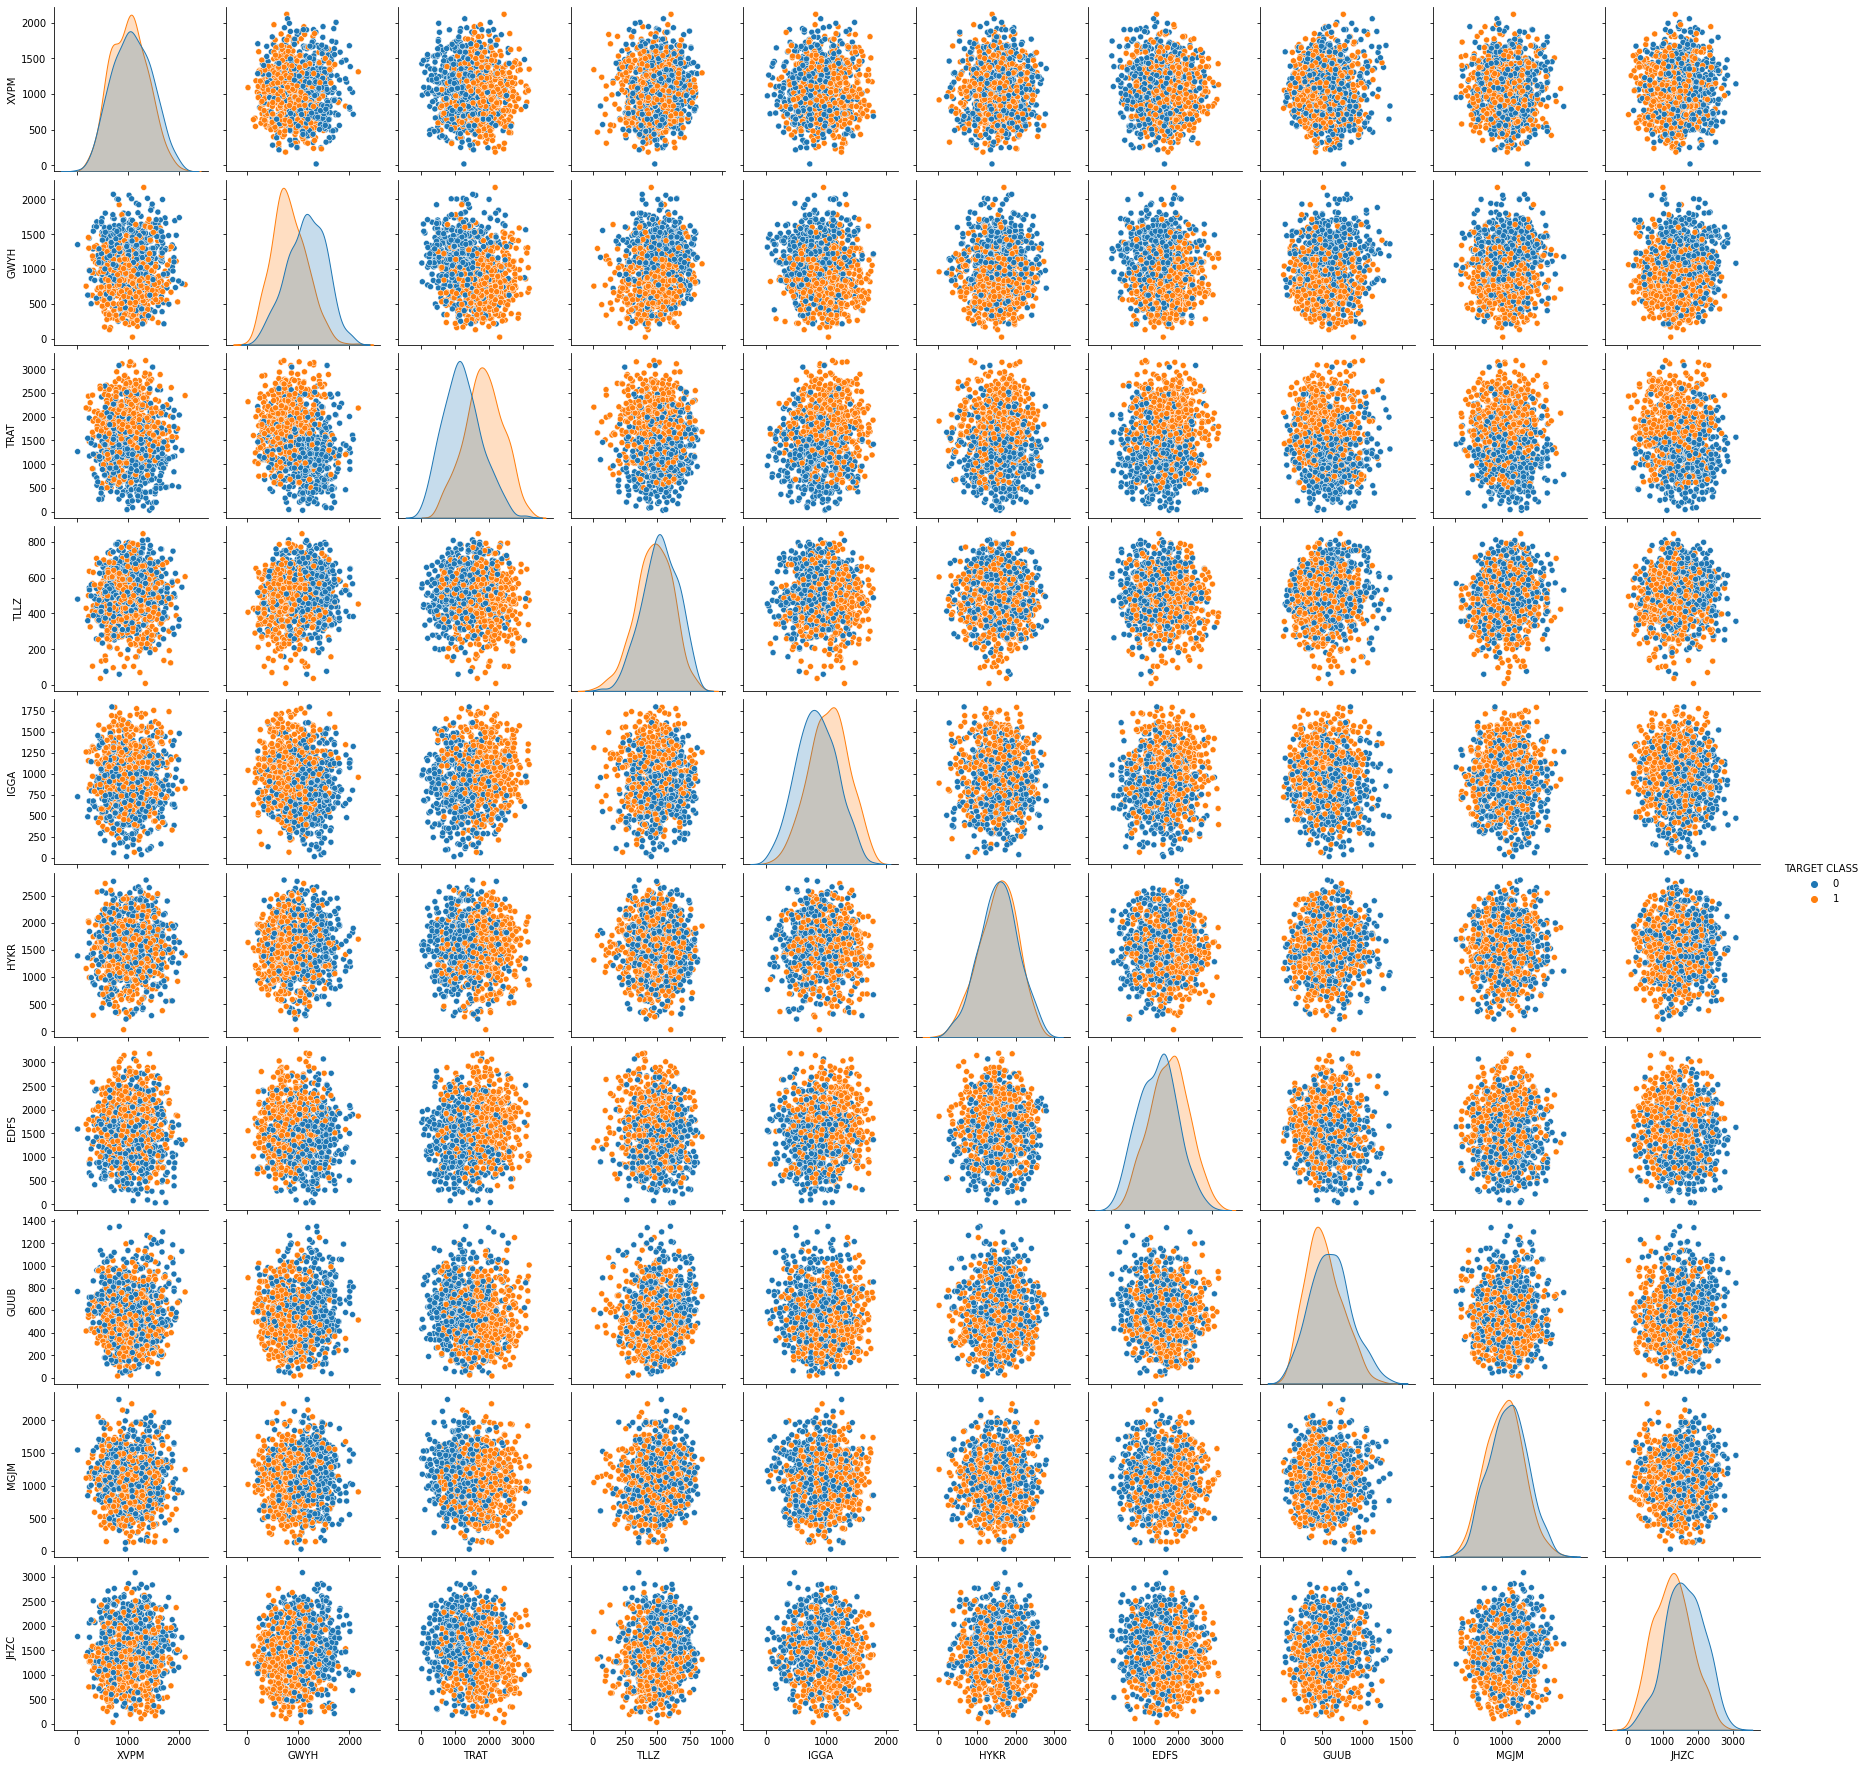

In [6]:
sns.pairplot(df, hue ='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [9]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [10]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [11]:
scaler.fit(df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']])

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
scaled_features = scaler.transform(df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']])
scaled_features[:5]

array([[ 1.56852168, -0.44343461,  1.61980773, -0.9582548 , -1.12848137,
         0.13833575,  0.98049313, -0.93279392,  1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , -1.50422015,  0.64000936,
         1.08155221, -1.18266332, -0.46186435,  0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285,  0.21339413, -0.0531708 ,
         2.03087225, -1.24070739,  1.14929806,  2.1847836 ,  0.34281129],
       [ 0.01153303,  0.19132405, -1.43347252, -0.10005318, -1.50722308,
        -1.75363188, -1.18356113, -0.88855689,  0.16230961, -0.00279348],
       [-0.09905922,  0.82081532, -0.90434645,  1.60901484, -0.28206546,
        -0.36509894, -1.09564397,  0.39141925, -1.3656025 ,  0.78776233]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
df_new = pd.DataFrame(scaled_features, columns= df.columns[:-1])
df_new[:5]

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [15]:
X = df_new
X[:5]

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [16]:
y = df['TARGET CLASS']
y[:5]

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [19]:
model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [20]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [21]:
predict= model.predict(X_test)
predict[:5]

array([0, 1, 1, 1, 0])

In [22]:
y[:5]

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

** Create a confusion matrix and classification report.**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
confusion_matrix(y_test, predict)

array([[110,  36],
       [ 47, 107]])

In [26]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [28]:
error_rate = []
for i in range(1,40):
    model_i = KNeighborsClassifier(n_neighbors=i)
    model_i.fit(X_train, y_train)
    predict_i = model_i.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'K values v/s Error Rate')

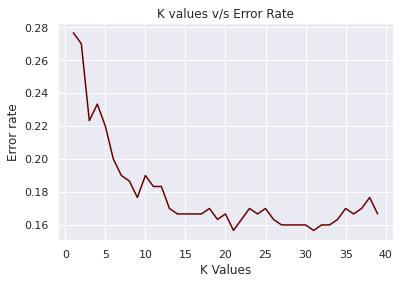

In [32]:
sns.lineplot(x=range(1,40), y= error_rate)
sns.set_theme(style='darkgrid', palette='hot')
plt.xlabel('K Values')
plt.ylabel('Error rate')
plt.title("K values v/s Error Rate")

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [33]:
model_final = KNeighborsClassifier(n_neighbors=30)
model_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [34]:
predict_final = model_final.predict(X_test)
predict_final[:5]

array([0, 0, 1, 0, 0])

In [35]:
y[:5]

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [36]:
print(confusion_matrix(y_test, predict_final))
print(classification_report(y_test, predict_final))

[[127  19]
 [ 29 125]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.87      0.81      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



So finally, we increased the4 accuracy from 72% to 84% of our model

# Great Job!